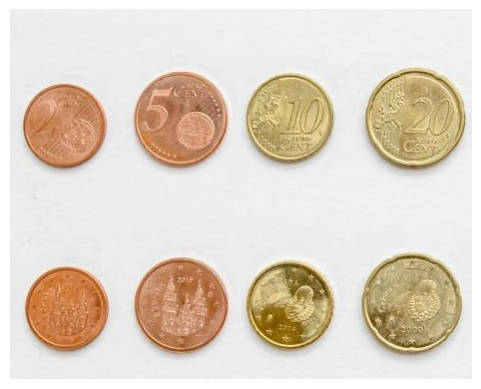

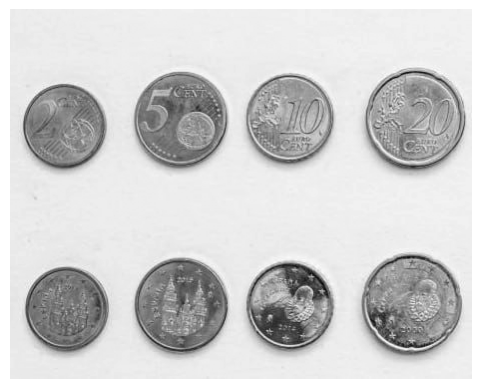

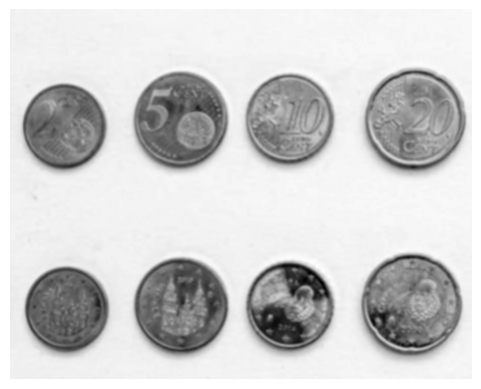

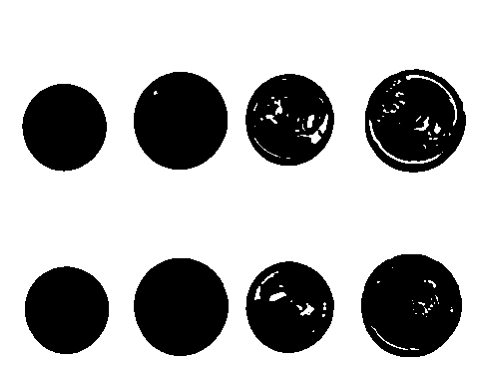

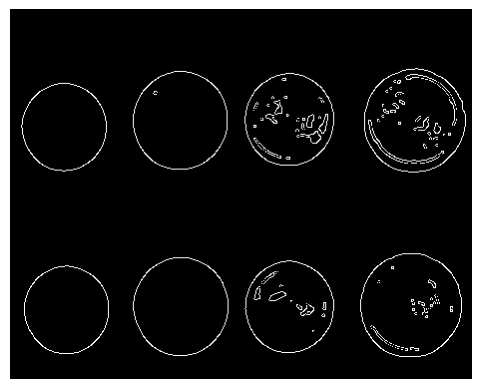

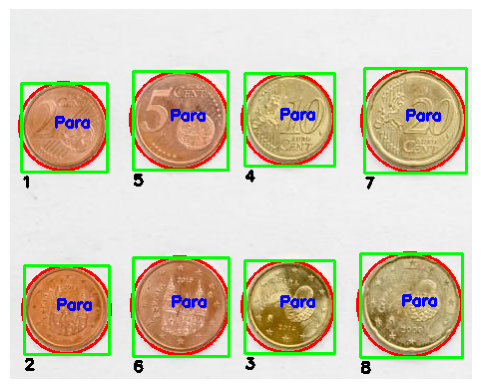

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(filename):
    img = cv2.imread("money.jpeg")
    if img is None:
        raise FileNotFoundError(f"money.jpeg bulunamadı")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    show_image(gray, cmap='gray')

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    show_image(blurred, cmap='gray')

    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    show_image(binary, cmap='gray')

    edges = cv2.Canny(binary, 50, 150)
    show_image(edges, cmap='gray')

    return edges

def detect_and_draw_contours(img, edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = img.copy()
    if not contours:
        raise ValueError("Edge Image'ta contour tespit edilemedi.")

    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        cv2.circle(result, (int(x), int(y)), int(radius), (255, 0, 0), 2)
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(result, 'Para', (x + w // 2 - 10, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    sorted_contours = sorted(((cv2.contourArea(c), c) for c in contours), key=lambda x: x[0])
    for i, (_, contour) in enumerate(sorted_contours, start=1):
        x, y, w, h = cv2.boundingRect(contour)
        text_y = min(y + h + 15, img.shape[0] - 5)
        cv2.putText(result, str(i), (x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    return result, len(contours)

def show_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Ana işlem
image = load_image('para.jpg')
show_image(image)
edges = preprocess_image(image)
final_result, count = detect_and_draw_contours(image, edges)
show_image(final_result)

